In [1]:
import sklearn
sklearn.__version__

'0.24.1'

In [2]:
%matplotlib inline

<h1> <center> Reducing Variance using CCP(Cost complexity Pruning technique) </h1> </center><br>
<p> <i> Decision tree generally portrays low bias and high variance. By default, when we create the tree using <code> sklearn.tree.DecisionTreeClassifier</code>, the tree is created to the maximum depth and there are high chances of the model getting over fitted. <br> So, the solution is to prune the tree (i.e. cutting the tree) so that we can reduce the depth of the tree and in that way genralise the model with low bias and low variance </p>  


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer # importing predefined datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree #to plot the decision tree

In [4]:
Feature,Target=load_breast_cancer(return_X_y=True)#we are using the breast cancer dataset
# to know about the dataset, keep the cursor on the function and press Shift + Tab

#creating the training and testing dataset
x_train,x_test,y_train,y_test=train_test_split(Feature,Target,test_size=0.3,random_state=12)

#fitting the model
model=DecisionTreeClassifier(random_state=0)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

[Text(655.65, 1009.5428571428572, 'X[22] <= 109.45\ngini = 0.467\nsamples = 398\nvalue = [148, 250]'),
 Text(418.5, 854.2285714285715, 'X[27] <= 0.163\ngini = 0.091\nsamples = 252\nvalue = [12, 240]'),
 Text(279.0, 698.9142857142858, 'X[3] <= 694.5\ngini = 0.04\nsamples = 244\nvalue = [5, 239]'),
 Text(167.39999999999998, 543.6, 'X[23] <= 868.75\ngini = 0.025\nsamples = 241\nvalue = [3, 238]'),
 Text(111.6, 388.28571428571433, 'X[24] <= 0.179\ngini = 0.017\nsamples = 240\nvalue = [2, 238]'),
 Text(55.8, 232.97142857142865, 'gini = 0.0\nsamples = 236\nvalue = [0, 236]'),
 Text(167.39999999999998, 232.97142857142865, 'X[22] <= 78.345\ngini = 0.5\nsamples = 4\nvalue = [2, 2]'),
 Text(111.6, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(223.2, 77.65714285714284, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(223.2, 388.28571428571433, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(390.59999999999997, 543.6, 'X[1] <= 17.985\ngini = 0.444\nsamples = 3\nvalue = [2

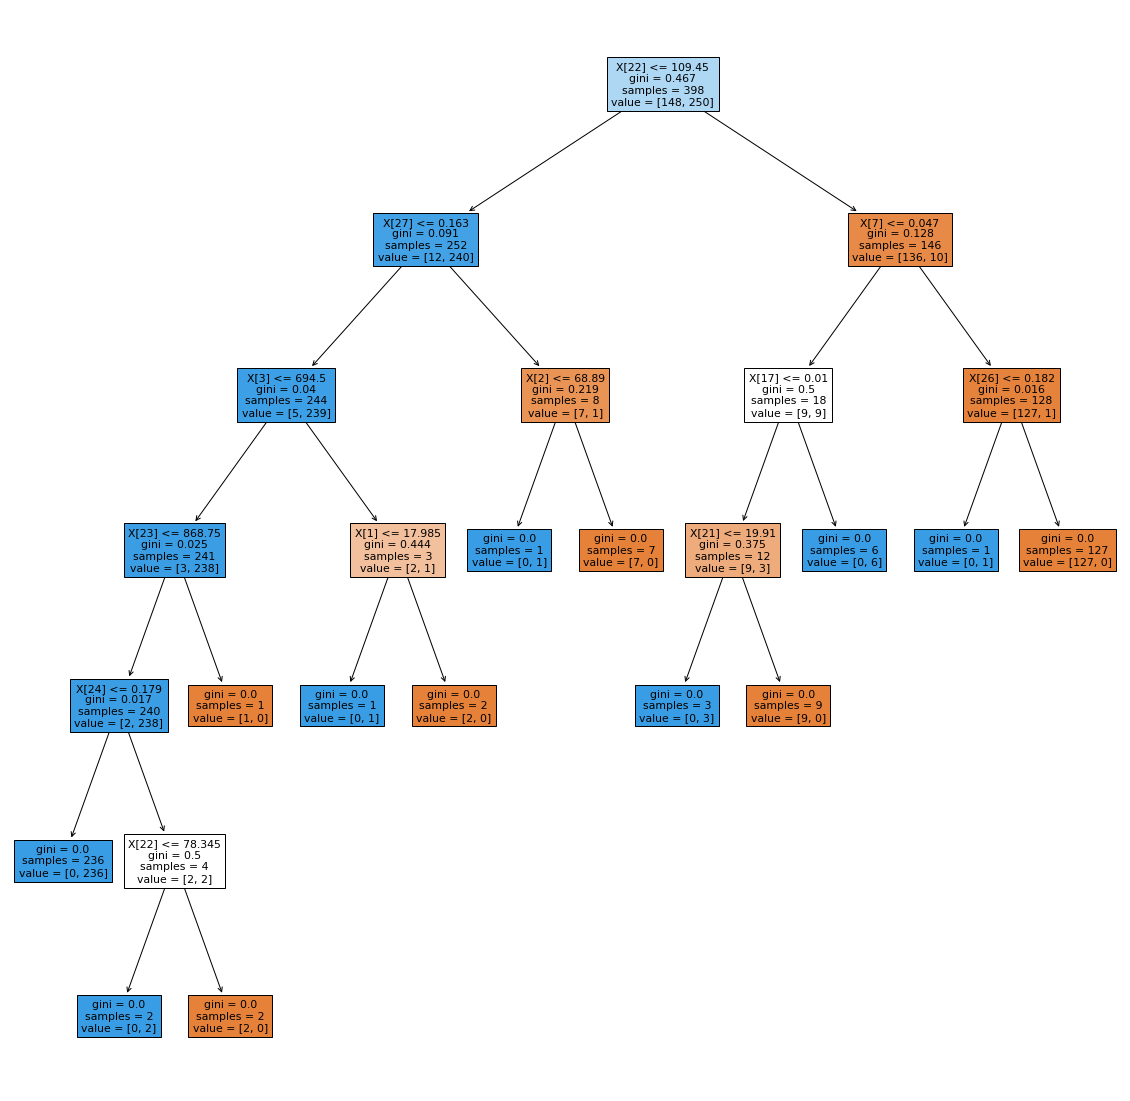

In [5]:
#plotting the tree
plt.figure(figsize=(20,20))
tree.plot_tree(model,filled=True)

In [6]:
print(model.score(x_train,y_train))
print(model.score(x_test,y_test))

1.0
0.9181286549707602


In [7]:
from sklearn.metrics import classification_report
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.92      0.86      0.89        64
           1       0.92      0.95      0.94       107

    accuracy                           0.92       171
   macro avg       0.92      0.91      0.91       171
weighted avg       0.92      0.92      0.92       171



<h1> <center> Prune the tree </h1> </center>

The <code> DecisionTreeClassifier() </code> has a paramter called ccp_alpha. So ccp stands for cost complexity pruning. Greater the value of ccp_alpha, more no of nodes will be pruned and hence the depth of the tree will be reduced. <br> <i> What is the optimal value for ccp_alpha? </i> <br> We can plot a validation curve to understand this. So the x axis will have ccp_alpha values and the y axis will have accuracy scores.

In [8]:
#lets plot the validation curve.
#step1: find the list of ccp_alphas
path=model.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas,impurities=path.ccp_alphas,path.impurities
ccp_alphas

array([0.        , 0.00335008, 0.00439698, 0.00496257, 0.00498587,
       0.00637296, 0.01130653, 0.01921046, 0.02842226, 0.36292052])

In [9]:
#step2: run and store models with different values of ccp alphas
models=[] #to store models
for x in ccp_alphas:
    model=DecisionTreeClassifier(ccp_alpha=x)
    model.fit(x_train,y_train)
    models.append(model)

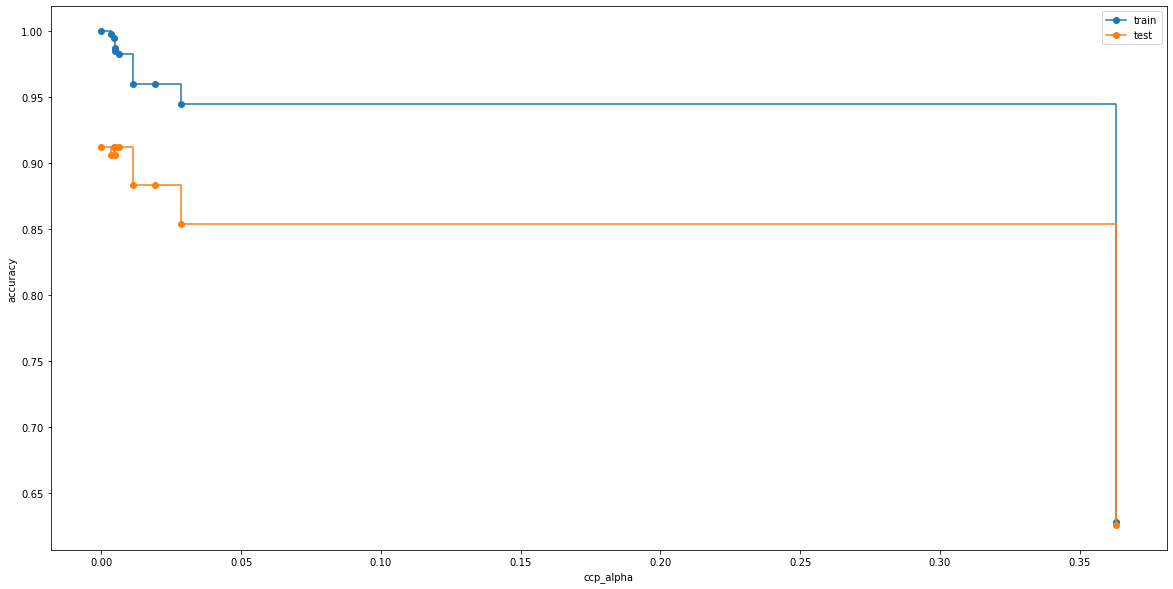

In [10]:
#step3: plot the curve
train_score=[x.score(x_train,y_train) for x in models]
test_score=[y.score(x_test,y_test) for y in models]

plt.figure(figsize=(20,10))
plt.plot(ccp_alphas,train_score,marker='o', drawstyle="steps-post")
plt.plot(ccp_alphas,test_score,marker='o', drawstyle="steps-post")
plt.xlabel("ccp_alpha")
plt.ylabel("accuracy")
plt.legend(["train","test"])

In [15]:
#for values in between 0 and 0.05 we can choose some particular value for which the scores are optimal and diference between them
#is minimum
model=DecisionTreeClassifier(ccp_alpha=0.01)
model.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01)

In [16]:
model.score(x_train,y_train)

0.9824120603015075

In [17]:
model.score(x_test,y_test)

0.9122807017543859

[Text(465.0, 733.86, 'X[22] <= 109.45\ngini = 0.467\nsamples = 398\nvalue = [148, 250]'),
 Text(279.0, 570.78, 'X[27] <= 0.163\ngini = 0.091\nsamples = 252\nvalue = [12, 240]'),
 Text(186.0, 407.70000000000005, 'X[23] <= 830.75\ngini = 0.04\nsamples = 244\nvalue = [5, 239]'),
 Text(93.0, 244.62, 'gini = 0.025\nsamples = 241\nvalue = [3, 238]'),
 Text(279.0, 244.62, 'gini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(372.0, 407.70000000000005, 'gini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(651.0, 570.78, 'X[7] <= 0.047\ngini = 0.128\nsamples = 146\nvalue = [136, 10]'),
 Text(558.0, 407.70000000000005, 'X[17] <= 0.01\ngini = 0.5\nsamples = 18\nvalue = [9, 9]'),
 Text(465.0, 244.62, 'X[1] <= 15.77\ngini = 0.375\nsamples = 12\nvalue = [9, 3]'),
 Text(372.0, 81.54000000000008, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(558.0, 81.54000000000008, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]'),
 Text(651.0, 244.62, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(744.0, 407.7000000000

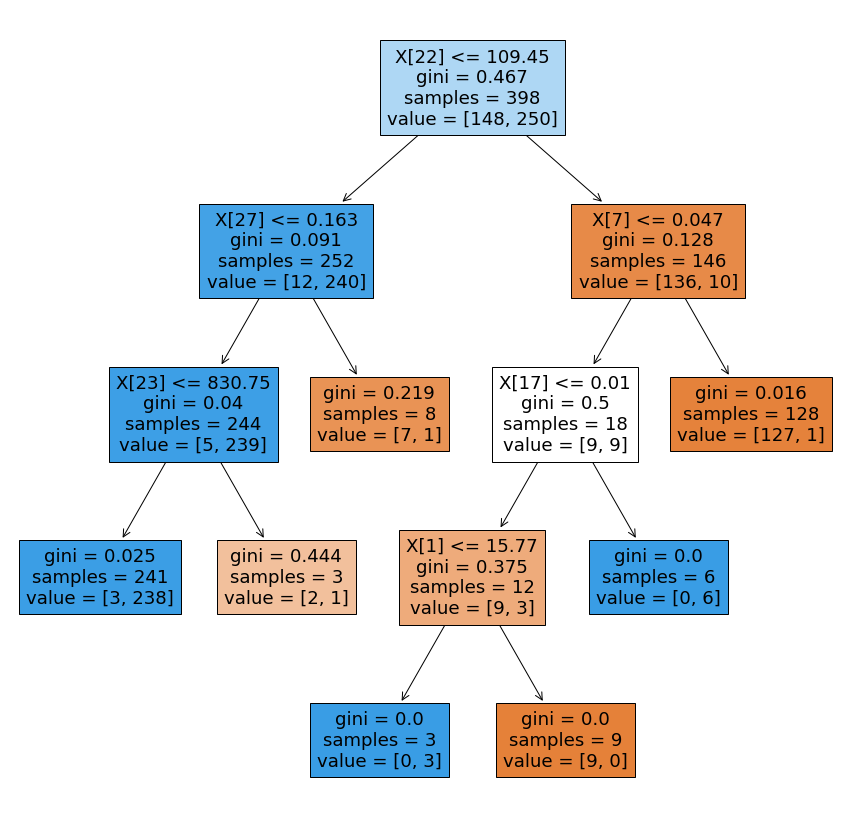

In [14]:
# we got pretty good scores
plt.figure(figsize=(15,15))
tree.plot_tree(model,filled=True)